# Subselecting nouns and visualise psycholinguistic properties

We now have a list of concrete-abstract word pairs generated using LexOPS (Taylor et al., 2020) and stored as `word_list_seed42_2023-04-14.csv`. In this notebook, we want to (1) remove some nouns because they are not appropriate for an experiment and (2) visualise the stimulus psycholinguistic properties.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

dir = 'U:\ownCloud\projects\FakeDiamond\stimuli'

First read in our word list generated with our RMarkdown script and do some tidying up.

In [2]:
# tidy up our pre-selected concrete-abstract words 
word_list = pd.read_csv(os.path.join(dir, 'concreteness_denotation/1_concreteness_list.csv')) 

# change all strings to lowercase
word_list = word_list.applymap(lambda s: s.lower() if type(s) == str else s) 

# rename columns
word_list.rename(columns={'string':'word','item_nr':'set_nr','condition':'concreteness','CNC.Brysbaert':'CNC_M','Zipf.SUBTLEX_UK':'Zipf','AoA.BrysbaertBiemiller':'AoA','Syllables.CMU':'Syllables','Phonemes.CMU':'Phonemes','VAL.Glasgow_Norms':'Valence','RT.BLP':'RT'}, inplace=True)

# drop irrelevant column
word_list.drop(labels=['match_null'], axis=1, inplace=True) 

Next, we want to import the *standard deviation* of concreteness ratings, also from Brysbaert and colleagues (2014), as well as the imageability of these words (i.e., how easy raters find it to visualise these words; Scott et al., 2019). 

In [3]:
# extract concreteness rating standard deviation from Brysbaert et al. (2014)
brysbaert_ratings = pd.read_csv(os.path.join(dir, 'resources', 'brysbaert_etal_2014.csv'))
brysbaert_ratings.rename(columns={'Word': 'word'}, inplace=True)
brysbaert_ratings.set_index('word', inplace=True)
word_list['CNC_SD'] = ''
word_list.set_index('word', inplace=True)
word_list['CNC_SD'] = word_list.index.map(brysbaert_ratings['Conc_SD'])
word_list.reset_index(inplace=True)

# add imageability ratings from Scott et al. (2019)
scott_ratings = pd.read_csv(os.path.join(dir, 'resources', 'scott_etal_2019.csv'))
scott_ratings.rename(columns={'Words': 'word'}, inplace=True)
scott_ratings.set_index('word', inplace=True)
word_list['IMAG'] = ''
word_list.set_index('word', inplace=True)
word_list['IMAG'] = word_list.index.map(scott_ratings['IMAG'])
word_list.reset_index(inplace=True)
word_list.rename(columns={'word': 'noun'}, inplace=True)
word_list['IMAG'] = pd.to_numeric(word_list['IMAG'])
word_list

,noun,set_nr,concreteness,Zipf,Length,Syllables,Phonemes,AoA,CNC_M,Valence,RT,CNC_SD,IMAG
0,longing,1,abstract,3.408385,7,2,5,8,2.14,4.3030,679.666667,1.13,3.235
1,sulphur,1,concrete,3.351834,7,2,5,6,4.23,4.7647,668.250000,1.25,4.727
2,terror,2,abstract,4.061785,6,2,4,4,2.43,1.6765,531.722222,1.48,4.353
3,poison,2,concrete,3.916628,6,2,5,4,4.27,1.9706,520.650000,1.01,5.324
4,duty,3,abstract,4.614918,4,2,4,4,2.19,5.0313,574.027778,1.36,3.061
...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,slum,167,concrete,3.320018,4,1,4,6,4.03,2.2500,634.108108,0.98,5.387
334,failure,168,abstract,4.432371,7,2,5,4,2.08,1.7222,520.000000,1.06,3.794
335,grave,168,concrete,4.198163,5,1,4,2,4.56,2.4242,524.750000,0.80,6.241
336,wrath,169,abstract,3.409226,5,1,3,12,2.42,2.6364,627.324324,1.33,2.875


Some nouns are not the most appropriate for a cognitive neuroscience experiment (based on intuitive judgement). Some nouns are mostly used in North America and might not be the most familiar to native speakers from our participant pool, who are more likely to be native British English speakers. As a quick diagnostic, we also check whether the nouns go well with the adjective `fake` (e.g., `fake nay`). So, I subselected them, along with their pair (to keep the psycholinguistic property matching), out by hand using Excel and keep a record of them here. 

In [4]:
nouns_to_be_removed = ['bland', 'slave', 'thrifty', 'vulgar', 'quantum', 'cervix', 'anus', 'doubt', 'meek', 'morsel', 'pimp', 
                       'innate', 'maggot', 'premium', 'comet', 'uplift', 'gag', 'urine', 'gripe', 'dung', 'hooker', 'fraud',
                       'farewell','delight','sperm','midst','kind','sane','thanks','mistress','stroke','awe']

In [5]:
# remove unwanted nouns
nouns_cleaned = word_list[~word_list.noun.isin(nouns_to_be_removed)]

# remove counterparts of unwanted nouns
for set_nr in range(1, len(nouns_cleaned.set_nr.unique())+1):
    if len(nouns_cleaned[nouns_cleaned.set_nr==set_nr]) < 2:
        nouns_cleaned = nouns_cleaned[nouns_cleaned.set_nr != set_nr]

# reset set number, reset index, sort dataframe
nouns_cleaned.set_nr = np.repeat(range(1, int(len(nouns_cleaned)/2)+1), 2)
nouns_cleaned.reset_index(inplace=True, drop=True)
nouns_cleaned.sort_values(by=['set_nr','concreteness'], inplace=True, ascending=[True,False])
nouns_cleaned

,noun,set_nr,concreteness,Zipf,Length,Syllables,Phonemes,AoA,CNC_M,Valence,RT,CNC_SD,IMAG
1,sulphur,1,concrete,3.351834,7,2,5,6,4.23,4.7647,668.250000,1.25,4.727
0,longing,1,abstract,3.408385,7,2,5,8,2.14,4.3030,679.666667,1.13,3.235
3,poison,2,concrete,3.916628,6,2,5,4,4.27,1.9706,520.650000,1.01,5.324
2,terror,2,abstract,4.061785,6,2,4,4,2.43,1.6765,531.722222,1.48,4.353
5,sauce,3,concrete,4.787860,5,1,3,2,4.75,5.7188,541.384615,0.59,6.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,woe,135,abstract,3.174302,3,1,2,8,1.96,2.4194,612.944444,1.37,2.710
271,grave,136,concrete,4.198163,5,1,4,2,4.56,2.4242,524.750000,0.80,6.241
270,failure,136,abstract,4.432371,7,2,5,4,2.08,1.7222,520.000000,1.06,3.794
273,syringe,137,concrete,3.122247,7,2,5,10,4.81,3.4375,675.194444,0.57,6.400


We can now visualise the stimulus psycholinguistic properties.

In [15]:
# data = nouns_cleaned
# fig, axes = plt.subplots(5, 2, figsize=(10,18))
# sns.set_context(font_scale=2)
# sns.set_theme(style='white', palette='Set2')
# sns.histplot(x='CNC_M', hue='concreteness', data=data, ax=axes[0,0], stat='density', kde=True).set(title='Concreteness rating: mean')

# sns.scatterplot(x='Conc_M', y='Conc_SD', data=brysbaert_ratings, s=1, alpha=0.3, ax=axes[0,1], color='black').set(title='Concreteness mean-SD distribution')
# sns.scatterplot(x='CNC_M', y='CNC_SD', data=data.query('concreteness == "abstract"'), s=15, alpha=1, ax=axes[0,1])
# sns.scatterplot(x='CNC_M', y='CNC_SD', data=data.query('concreteness == "concrete"'), s=15, alpha=1, ax=axes[0,1])
# sns.histplot(x='IMAG', hue='concreteness', data=data, ax=axes[1,0], element='step').set(title='Imageability rating')
# sns.histplot(x='Valence', hue='concreteness', data=data, ax=axes[1,1], element='step').set(title='Valence')

# sns.countplot(x='AoA', hue='concreteness', data=data, ax=axes[2,0]).set(title='Age of acquisition')
# sns.countplot(x='Length', hue='concreteness', data=data, ax=axes[2,1]).set(title='Number of letters')

# sns.countplot(x='Phonemes', hue='concreteness', data=data, ax=axes[3,0]).set(title='Number of phonemes')
# sns.countplot(x='Syllables', hue='concreteness', data=data, ax=axes[3,1]).set(title='Number of syllables')

# sns.histplot(x='Zipf', hue='concreteness', data=data, ax=axes[4,0], element='step').set(title='Zipf frequency')
# sns.histplot(x='RT', hue='concreteness', data=data, ax=axes[4,1], element='step').set(title='Lexical decision reaction time')
# # f.suptitle('Psycholinguistic properties of {} concrete-abstract word pairs'.format(int(len(nouns_long)/2)), fontsize=16)
# fig.tight_layout()

# # for ax, label in zip(axes.ravel(), 'ABCDEFGHIJ'):
# #     ax.text(0.03, ax.get_position().ymax, label, transform=fig.transFigure,
# #             fontsize=15, fontweight='bold', va='top', ha='left')

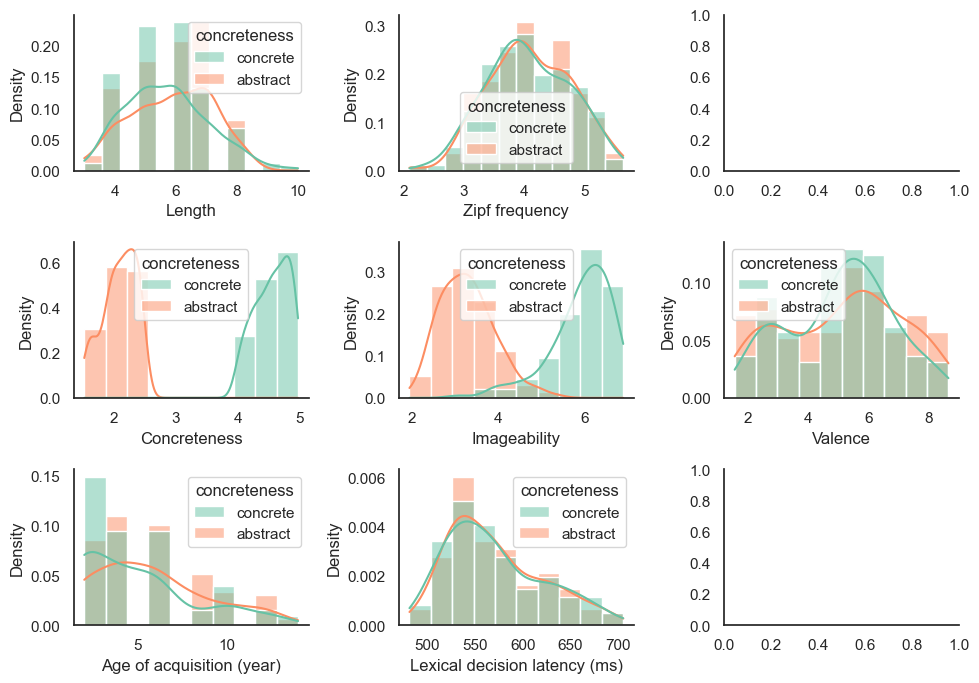

In [48]:
data = nouns_cleaned
fig, axes = plt.subplots(3, 3, figsize=(10,7))
sns.set_context(font_scale=1)
sns.set_theme(style='white', palette='Set2')

sns.histplot(x='Length', hue='concreteness', data=data, ax=axes[0,0], stat='density', kde=True)
sns.histplot(x='Zipf', hue='concreteness', data=data, ax=axes[0,1], stat='density', kde=True).set_xlabel('Zipf frequency')

sns.histplot(x='CNC_M', hue='concreteness', data=data, ax=axes[1,0], stat='density', kde=True).set_xlabel('Concreteness')
sns.histplot(x='IMAG', hue='concreteness', data=data, ax=axes[1,1], stat='density', kde=True).set_xlabel('Imageability')
sns.histplot(x='Valence', hue='concreteness', data=data, ax=axes[1,2], stat='density', kde=True).set_xlabel('Valence')

sns.histplot(x='AoA', hue='concreteness', data=data, ax=axes[2,0], stat='density', kde=True).set_xlabel('Age of acquisition (year)')
sns.histplot(x='RT', hue='concreteness', data=data, ax=axes[2,1], stat='density', kde=True).set_xlabel('Lexical decision latency (ms)')

# sns.countplot(x='Phonemes', hue='concreteness', data=data, ax=axes[3,0]).set(title='Number of phonemes')
# sns.countplot(x='Syllables', hue='concreteness', data=data, ax=axes[3,1]).set(title='Number of syllables')

# f.suptitle('Psycholinguistic properties of {} concrete-abstract word pairs'.format(int(len(nouns_long)/2)), fontsize=16)
fig.tight_layout()
sns.despine()

# for ax, label in zip(axes.ravel(), 'ABCDEFGHIJ'):
#     ax.legend(labelcolor='linecolor')

# for ax, label in zip(axes.ravel(), 'ABCDEFGHIJ'):
#     ax.text(0.03, ax.get_position().ymax, label, transform=fig.transFigure,
#             fontsize=15, fontweight='bold', va='top', ha='left')

In [7]:
# nouns_cleaned.to_csv(os.path.join(dir, 'concreteness_denotation/2_nouns_cleaned.csv'.format(date.today())), index=False) # save to disk